Introduction

What is COVID-19?

COVID-19 (Coronavirus Disease 2019) is an infectious disease caused by the SARS-CoV-2 virus. It was first identified in December 2019 in Wuhan, China, and quickly spread across the globe, leading to a worldwide pandemic. Symptoms range from mild (fever, cough, fatigue) to severe (pneumonia, respiratory failure), and the disease has had major impacts on health systems, economies, and daily life.

Why Analyze COVID-19 Data?

Analyzing COVID-19 data helps us understand how the disease has spread, how different countries responded, and what trends emerged over time. By studying this data, we can see patterns in case numbers, deaths, recovery rates. Such analysis is useful for researchers, governments, and the general public to make informed decisions and prepare for future health crises.

Objectives of the Project:

Explore trends in COVID-19 cases and deaths over time.

Visualize patterns using graphs and charts for better understanding.

Identify peaks and declines in the pandemic across regions.

Dataset Information

Source: Kaggle COVID-19 Dataset

Description: This dataset contains daily COVID-19 case reports from various countries and regions worldwide, starting from January 22, 2020.

Columns:

1.SNo – Serial number of the record.

2.ObservationDate – Date of the observation in MM/DD/YYYY format.

3.Province/State – Province, state, or region name (if applicable, else may be blank).

4.Country/Region – Name of the country or region.

5.Last Update – The timestamp of the last update for the record.

6.Confirmed – Cumulative number of confirmed COVID-19 cases.

7.Deaths – Cumulative number of deaths due to COVID-19.

8.Recovered – Cumulative number of recovered patients.

Import Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Load Dataset

In [3]:
import os

In [4]:
os.getcwd()

'C:\\Users\\v'

In [5]:
os.chdir("C:\\Users\\v\\Desktop")

In [6]:
os.getcwd()

'C:\\Users\\v\\Desktop'

In [7]:
df = pd.read_csv("covid_19_data.csv")

In [8]:
df

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
306424,306425,05/29/2021,Zaporizhia Oblast,Ukraine,2021-05-30 04:20:55,102641.0,2335.0,95289.0
306425,306426,05/29/2021,Zeeland,Netherlands,2021-05-30 04:20:55,29147.0,245.0,0.0
306426,306427,05/29/2021,Zhejiang,Mainland China,2021-05-30 04:20:55,1364.0,1.0,1324.0
306427,306428,05/29/2021,Zhytomyr Oblast,Ukraine,2021-05-30 04:20:55,87550.0,1738.0,83790.0


Data Cleaning

In [9]:
df.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306429 entries, 0 to 306428
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   SNo              306429 non-null  int64  
 1   ObservationDate  306429 non-null  object 
 2   Province/State   228326 non-null  object 
 3   Country/Region   306429 non-null  object 
 4   Last Update      306429 non-null  object 
 5   Confirmed        306429 non-null  float64
 6   Deaths           306429 non-null  float64
 7   Recovered        306429 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 18.7+ MB


In [11]:
df.describe()

,SNo,Confirmed,Deaths,Recovered
count,306429.000000,3.064290e+05,306429.000000,3.064290e+05
mean,153215.000000,8.567091e+04,2036.403268,5.042029e+04
std,88458.577156,2.775516e+05,6410.938048,2.015124e+05
min,1.000000,-3.028440e+05,-178.000000,-8.544050e+05
25%,76608.000000,1.042000e+03,13.000000,1.100000e+01
50%,153215.000000,1.037500e+04,192.000000,1.751000e+03
75%,229822.000000,5.075200e+04,1322.000000,2.027000e+04
max,306429.000000,5.863138e+06,112385.000000,6.399531e+06


In [12]:
df.isnull().sum() 

SNo                    0
ObservationDate        0
Province/State     78103
Country/Region         0
Last Update            0
Confirmed              0
Deaths                 0
Recovered              0
dtype: int64

In [14]:
df['Province/State'] = df['Province/State'].fillna('Unknown')

In [15]:
df.isnull().sum() 

SNo                0
ObservationDate    0
Province/State     0
Country/Region     0
Last Update        0
Confirmed          0
Deaths             0
Recovered          0
dtype: int64

In [16]:
df.rename(columns={'Country/Region': 'Country','Province/State': 'Province',}, inplace=True)

In [17]:
df

,SNo,ObservationDate,Province,Country,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
306424,306425,05/29/2021,Zaporizhia Oblast,Ukraine,2021-05-30 04:20:55,102641.0,2335.0,95289.0
306425,306426,05/29/2021,Zeeland,Netherlands,2021-05-30 04:20:55,29147.0,245.0,0.0
306426,306427,05/29/2021,Zhejiang,Mainland China,2021-05-30 04:20:55,1364.0,1.0,1324.0
306427,306428,05/29/2021,Zhytomyr Oblast,Ukraine,2021-05-30 04:20:55,87550.0,1738.0,83790.0


Basic Data Exploration

Total confirmed cases worldwide:

In [18]:
df['Confirmed'].sum()

np.float64(26252051758.0)

Total deaths and recoveries:

In [19]:
df['Deaths'].sum()

np.float64(624013017.0)

In [20]:
df['Recovered'].sum()

np.float64(15450237912.0)

Number of unique countries:

In [21]:
df['Country'].unique()

array(['Mainland China', 'Hong Kong', 'Macau', 'Taiwan', 'US', 'Japan',
       'Thailand', 'South Korea', 'China', 'Kiribati', 'Singapore',
       'Philippines', 'Malaysia', 'Vietnam', 'Australia', 'Mexico',
       'Brazil', 'Colombia', 'France', 'Nepal', 'Canada', 'Cambodia',
       'Sri Lanka', 'Ivory Coast', 'Germany', 'Finland',
       'United Arab Emirates', 'India', 'Italy', 'UK', 'Russia', 'Sweden',
       'Spain', 'Belgium', 'Others', 'Egypt', 'Iran', 'Israel', 'Lebanon',
       'Iraq', 'Oman', 'Afghanistan', 'Bahrain', 'Kuwait', 'Austria',
       'Algeria', 'Croatia', 'Switzerland', 'Pakistan', 'Georgia',
       'Greece', 'North Macedonia', 'Norway', 'Romania', 'Denmark',
       'Estonia', 'Netherlands', 'San Marino', ' Azerbaijan', 'Belarus',
       'Iceland', 'Lithuania', 'New Zealand', 'Nigeria', 'North Ireland',
       'Ireland', 'Luxembourg', 'Monaco', 'Qatar', 'Ecuador',
       'Azerbaijan', 'Czech Republic', 'Armenia', 'Dominican Republic',
       'Indonesia', 'Portugal

Country-wise Analysis

Top 10 countries with the most confirmed cases:

In [22]:
 df.groupby('Country')['Confirmed'].sum().sort_values(ascending=False).head(10)

Country
US         6.049146e+09
India      3.226768e+09
Brazil     2.653588e+09
Russia     9.305488e+08
France     8.551890e+08
UK         7.837944e+08
Spain      6.491118e+08
Italy      6.366943e+08
Turkey     6.189410e+08
Germany    5.241668e+08
Name: Confirmed, dtype: float64

Top 10 countries with the most deaths:

In [23]:
df.groupby('Country')['Deaths'].sum().sort_values(ascending=False).head(10)

Country
US        123303762.0
Brazil     72624610.0
India      44424723.0
Mexico     43005509.0
UK         29171984.0
Italy      26000702.0
France     22720818.0
Spain      19065104.0
Russia     18363719.0
Iran       15744407.0
Name: Deaths, dtype: float64

Visualization Section

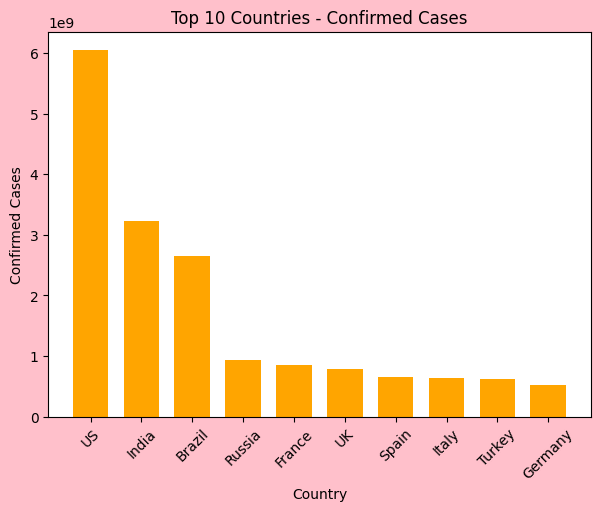

In [36]:
#Bar chart
top_confirmed = df.groupby('Country')['Confirmed'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(7,5),facecolor='#FFC0CB')
plt.bar(top_confirmed.index, top_confirmed.values, color="orange", width=0.7)
plt.title('Top 10 Countries - Confirmed Cases')
plt.xlabel('Country')
plt.ylabel('Confirmed Cases')
plt.xticks(rotation=45)
plt.show()

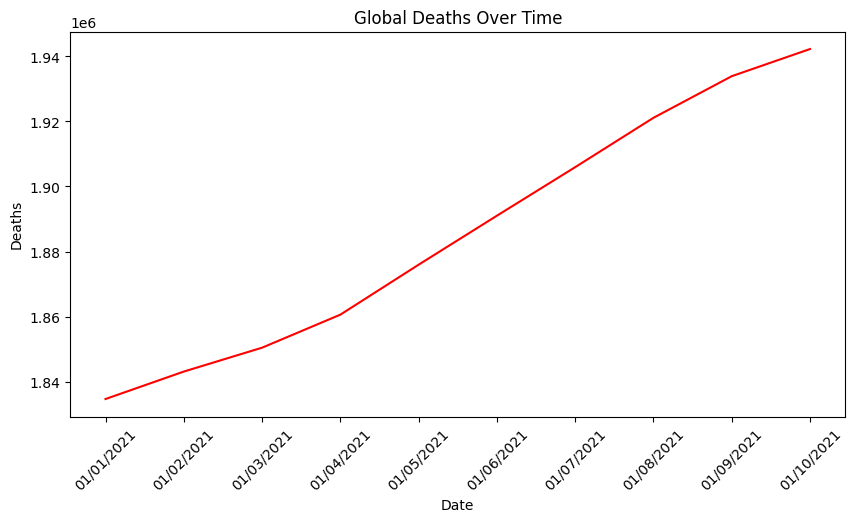

In [90]:
#Line chart
data = df.groupby('ObservationDate')['Deaths'].sum().head(10).reset_index()
x = data['ObservationDate']
y = data['Deaths']
plt.figure(figsize=(10,5))
plt.plot(x, y, color='red')
plt.title('Global Deaths Over Time')
plt.ylabel('Deaths')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.show()



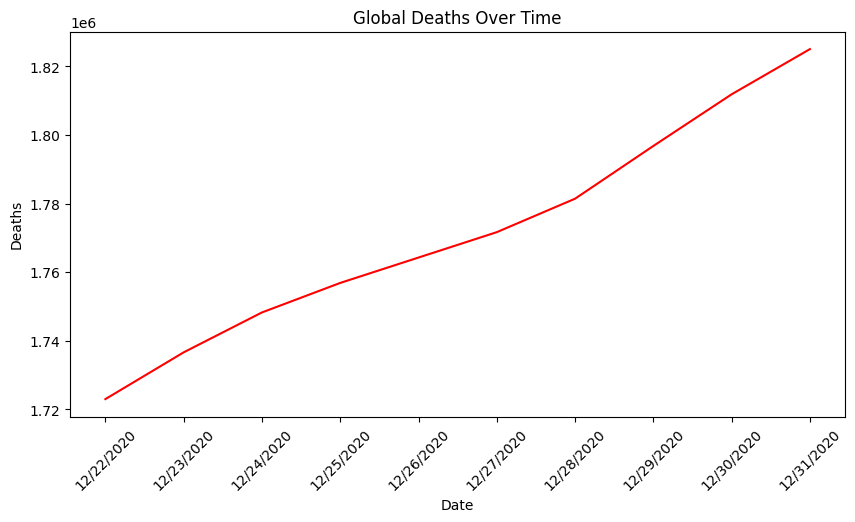

In [91]:
data = df.groupby('ObservationDate')['Deaths'].sum().tail(10).reset_index()
x = data['ObservationDate']
y = data['Deaths']
plt.figure(figsize=(10,5))
plt.plot(x, y, color='red')
plt.title('Global Deaths Over Time')
plt.ylabel('Deaths')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.show()

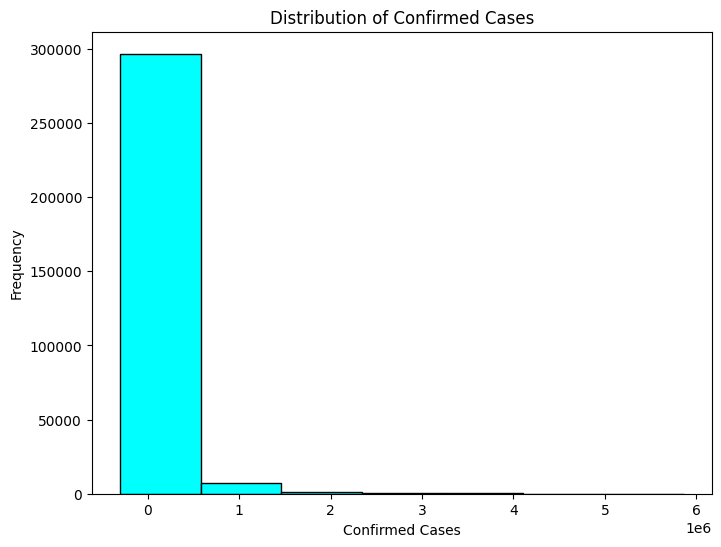

In [79]:
#Histogram
plt.figure(figsize=(8,6))
plt.hist(df['Confirmed'], bins=7, color='cyan', edgecolor='black')
plt.title('Distribution of Confirmed Cases')
plt.xlabel('Confirmed Cases')
plt.ylabel('Frequency')
plt.show()

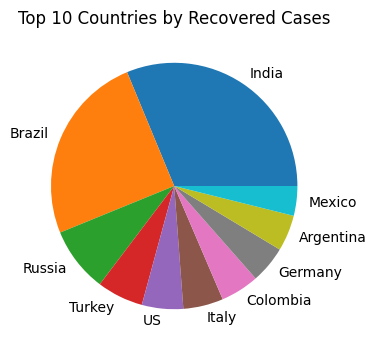

In [56]:
#Pie chart
recovered = df.groupby('Country')['Recovered'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(7,4))
plt.pie(recovered.values, labels=recovered.index)
plt.title('Top 10 Countries by Recovered Cases')
plt.show()



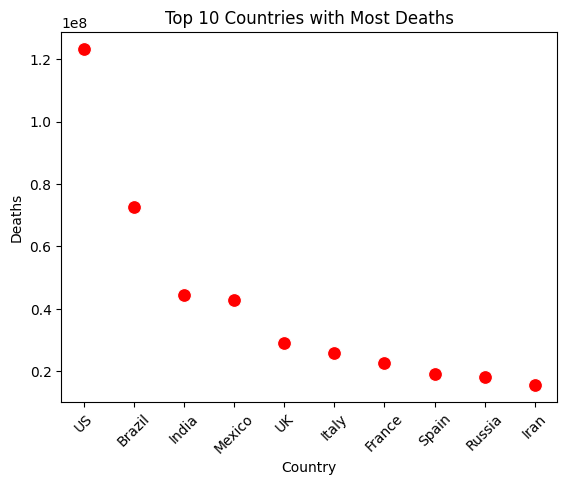

In [66]:
#Scatterplot
top_deaths = df.groupby('Country')['Deaths'].sum().nlargest(10).reset_index()
sns.scatterplot(x='Country', y='Deaths', data=top_deaths, color='red', s=100)
plt.xticks(rotation=45)
plt.title('Top 10 Countries with Most Deaths')
plt.show()

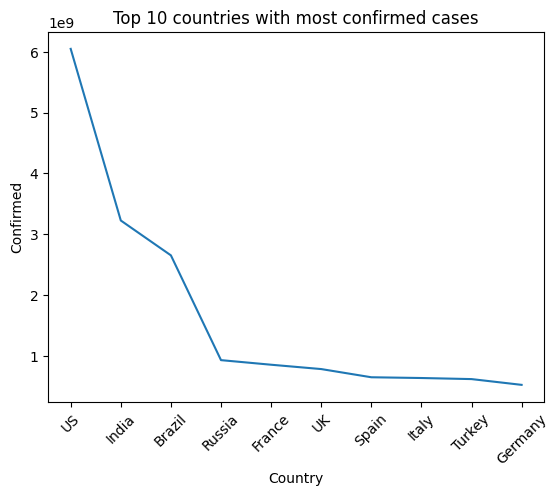

In [67]:
#Line plot
top_confirmed=df.groupby('Country')['Confirmed'].sum().nlargest(10).reset_index()
sns.lineplot(data=top_confirmed,x="Country",y="Confirmed")
plt.title('Top 10 countries with most confirmed cases')
plt.xticks(rotation=45)
plt.show()

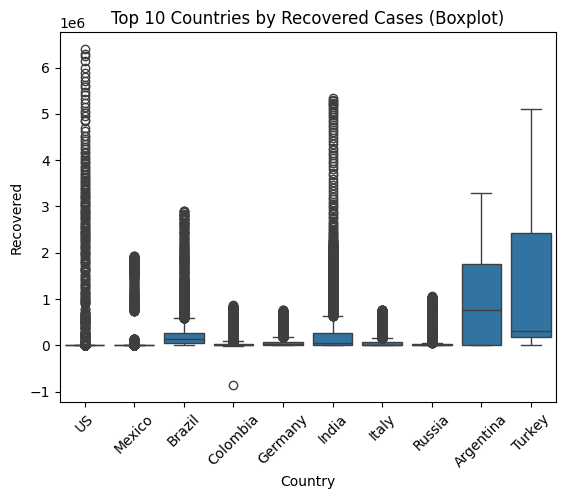

In [74]:
#Box plot
top10 = df.groupby("Country")["Recovered"].sum().nlargest(10).reset_index()
top10_data = df.merge(top10["Country"], on="Country")
sns.boxplot(x="Country", y="Recovered", data=top10_data)
plt.xticks(rotation=45)
plt.title("Top 10 Countries by Recovered Cases (Boxplot)")
plt.show()

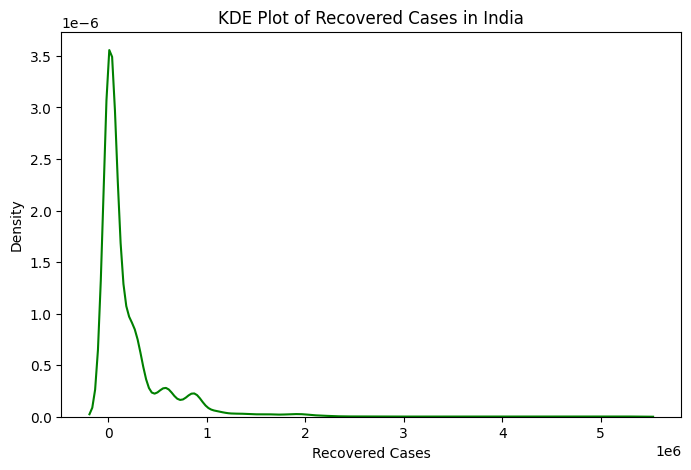

In [75]:
#kde plot
india_recovered = df[df["Country"] == "India"]
plt.figure(figsize=(8,5))
sns.kdeplot(india_recovered["Recovered"], color="green")
plt.title("KDE Plot of Recovered Cases in India")
plt.xlabel("Recovered Cases")
plt.show()

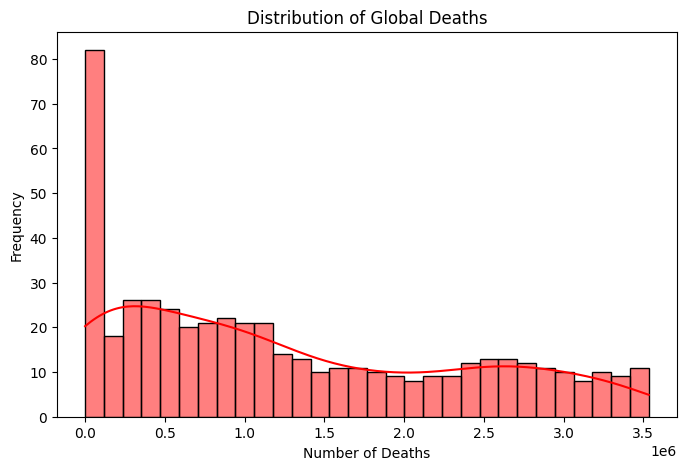

In [83]:
#Distributuion plot
daily_deaths = df.groupby("ObservationDate")["Deaths"].sum().reset_index()
plt.figure(figsize=(8,5))
sns.histplot(daily_deaths["Deaths"], bins=30, kde=True, color="red")
plt.title("Distribution of Global Deaths")
plt.xlabel("Number of Deaths")
plt.ylabel("Frequency")
plt.show()

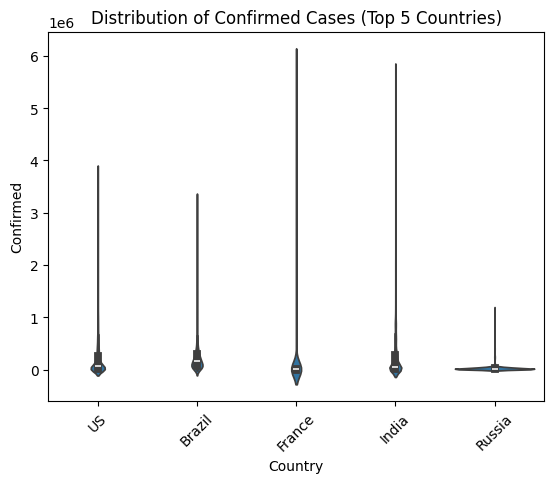

In [86]:
#violin plot
top5_confirmed = df.groupby("Country")["Confirmed"].sum().nlargest(5).reset_index()
data_confirmed = df[df["Country"].isin(top5_confirmed["Country"])]
sns.violinplot(x="Country", y="Confirmed", data=data_confirmed)
plt.title("Distribution of Confirmed Cases (Top 5 Countries)")
plt.xticks(rotation=45)
plt.show()

Conclusion

From the analysis of the COVID-19 dataset, we observed important global trends and country-wise differences. The data clearly shows that a few countries reported the highest number of confirmed cases, deaths, and recoveries. Visualizations such as line charts, scatter plots, boxplots, and violin plots helped us explore how the virus spread over time, compare the impact across countries, and understand the distribution of cases.

Overall, this project highlights the importance of data analysis in tracking pandemics, identifying severely affected regions, and supporting decision-making for health policies.